[[[234 234 234]
  [234 234 234]
  [234 234 234]
  ...
  [234 234 234]
  [234 234 234]
  [234 234 234]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]
  ...
  [240 240 240]
  [240 240 240]
  [240 240 240]]

 [[245 245 245]
  [245 245 245]
  [245 245 245]
  ...
  [245 245 245]
  [245 245 245]
  [245 245 245]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


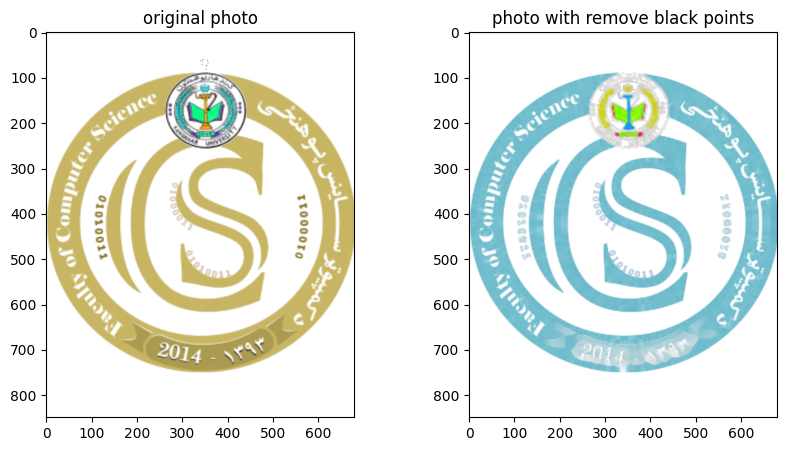

In [1]:
import cv2
import numpy as np
photo_path='./Screenshot_20230124-184442.png'
photo=cv2.imread(photo_path)

matrix=np.array(photo)
print(matrix)

def remove_black_points(matrix):
  lower_black=np.array([0,0,0])
  upper_black=np.array([180,255,200])

  hsv=cv2.cvtColor(matrix,cv2.COLOR_BGR2HSV)

  mask=cv2.inRange(hsv,lower_black,upper_black)

  result=cv2.inpaint(matrix,mask,inpaintRadius=3,flags=cv2.INPAINT_TELEA)
  return result


result_matrix=remove_black_points(matrix)


result_photo=cv2.cvtColor(result_matrix,cv2.COLOR_BGR2RGB)


import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(photo)
plt.title('original photo')

plt.subplot(1,2,2)
plt.imshow(result_photo)
plt.title('photo with remove black points')

plt.show()



In [6]:
# Certainly! Here's an updated version of the code that allows you to dynamically select an image file and interactively specify the color of the surrounding pixels to replace the black points:

# ```python
import numpy as np
from PIL import Image, ImageDraw

def find_black_points(matrix):
    black_points = []
    rows, cols, _ = matrix.shape
    for i in range(rows):
        for j in range(cols):
            pixel = matrix[i, j]
            # Check if the pixel is black
            if np.all(pixel == [0, 0, 0]):  # Assuming black is represented by [0, 0, 0]
                black_points.append((i, j))
    return black_points

def get_surrounding_pixels(matrix, point):
    i, j = point
    rows, cols, _ = matrix.shape
    neighbors = []
    for x in range(i-1, i+2):
        for y in range(j-1, j+2):
            if 0 <= x < rows and 0 <= y < cols:
                neighbors.append(matrix[x, y])
    return neighbors

def remove_black_points(image, black_points, surrounding_color):
    new_image = image.copy()
    draw = ImageDraw.Draw(new_image)
    for point in black_points:
        x, y = point
        # Get the surrounding pixels
        neighbors = get_surrounding_pixels(matrix, point)
        # Calculate the average color
        avg_color = tuple(np.mean(neighbors, axis=0).astype(np.uint8))
        # Set the pixel color to the specified surrounding color
        draw.point((y, x), fill=surrounding_color)
    return new_image

def main():
    # Specify the path to your image file
    image_path = input( "download.png")
    
    # Convert the image to a matrix
    matrix = image_to_matrix(image_path)
    
    # Find the black points in the matrix
    black_points = find_black_points(matrix)

    # Open the image
    image = Image.open(image_path)
    
    # Specify the color of the surrounding pixels (R, G, B)
    surrounding_color = input("Enter the color of the surrounding pixels (R, G, B): ")
    surrounding_color = tuple(map(int, surrounding_color.split(',')))
    
    # Remove black points from the image
    image_without_points = remove_black_points(image, black_points, surrounding_color)
    
    # Display the image without black points
    image_without_points.show()

if __name__ == '__main__':
    main() 

# In this updated code, you'll be prompted to enter the path to your image file and the color of the surrounding pixels. The `input` function is used to capture the user's input.

# The image file path is obtained using
#  `input("Enter the path to your image file: ")`, and the surrounding color is obtained using `input("Enter the color of the surrounding pixels (R, G, B): ")`. The input color is then converted into a tuple of integers using `map(int, surrounding_color.split(','))`.

# The rest of the code remains the same, where the image is opened, the black points are found, and then the black points are removed by calling `remove_black_points` with the specified surrounding color. Finally, the resulting image without the black points is displayed using `image_without_points.show()`.

NameError: name 'image_to_matrix' is not defined